In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
from scipy import stats
from bidi.algorithm import get_display
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.preprocessing import OneHotEncoder



In [3]:
# Load the csv:
H_data = pd.read_csv('housing.csv') 

In [4]:
H_data.head(5)

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...


In [5]:
housing = H_data.copy(deep = True)
housing.head()

,Unnamed: 0,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,521,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,...,0,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083
1,1653,جدة,حي بريمان,جنوب,350,0,7,5,2,1,...,1,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...
2,131,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,...,0,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...
3,2284,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,...,1,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...
4,65,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,...,1,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...


In [6]:
housing.shape

(2974, 25)

In [7]:
H_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2974 non-null   int64 
 1   city          2974 non-null   object
 2   district      2974 non-null   object
 3   front         2974 non-null   object
 4   size          2974 non-null   int64 
 5   property_age  2974 non-null   int64 
 6   bedrooms      2974 non-null   int64 
 7   bathrooms     2974 non-null   int64 
 8   livingrooms   2974 non-null   int64 
 9   kitchen       2974 non-null   int64 
 10  garage        2974 non-null   int64 
 11  driver_room   2974 non-null   int64 
 12  maid_room     2974 non-null   int64 
 13  furnished     2974 non-null   int64 
 14  ac            2974 non-null   int64 
 15  roof          2974 non-null   int64 
 16  pool          2974 non-null   int64 
 17  frontyard     2974 non-null   int64 
 18  basement      2974 non-null   int64 
 19  duplex

In [8]:
#number of row 
nrows = 2974
# number of column?
ncols = 25
# number of columns string and numeric ?
n_num_cols = 21
n_str_cols = 4

In [9]:
print('There are {0} rows and {1} columns in this dataset.'.format(nrows, ncols))
print('Of those columns, there are {0} numerical columns and {1} categorical columns.'.format(n_num_cols, n_str_cols))

There are 2974 rows and 25 columns in this dataset.
Of those columns, there are 21 numerical columns and 4 categorical columns.


In [10]:
H_data.isnull().sum()

Unnamed: 0       0
city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         62
dtype: int64

In [11]:
col_missing_value = ['details']

In [12]:
print('The following columns have missing values: {0}'.format(col_missing_value))

The following columns have missing values: ['details']


In [13]:
housing.drop(columns= 'Unnamed: 0',inplace = True)


#### - Dictionary

        - city: 
                city where house locate in
        - district:
                 district where house locate in
        - front:
                 What is the house front is north, west .. etc
        - size: 
                size in m^2
        - propertyage:
                 property age for the house 
        - bedrooms:
                 number of bedrooms 
        - bathrooms:
                 number of bathrooms 
        - livingrooms:
                 number of livingrooms 
        - kitchen:
                 show whether the house have a kitchen or not 
        - garage:
                 show whether the house have a garage or not 
        - driverroom:
                 show whether the house have a driverroom or not
        - maidroom:
                 show whether the house have a maid_room or not
        - furnished:
                 show whether the house is furnished or not
        - ac:  
                show whether the house have a ac or not
        - roof: 
                show whether the house have a space for roof on top or not
        - pool: 
                show whether the house have a pool or not
        - frontyard:
                 show whether the house have a frontyard or not
        - basement:
                 show whether the house have a basement or not
        - duplex:
                 show whether the house is a duplex or not
        - stairs: 
                show whether the house have a stairs or not
        - elevator:
                 show whether the house have an elevator or not
        - fireplace:
                 show whether the house have a fireplace or not
        - price: 
                show the price of the house
        - details: 
                shows any additional details from the house owner about the house


In [14]:
housing['city'].value_counts().to_frame()

,city
الخبر,778
الرياض,770
الدمام,722
جدة,704


In [15]:
print(' The least  city in which we have offers is: {0}  And the  highest city we have offers in: {1}'.format(housing['city'].max(),housing['city'].min()))

 The least  city in which we have offers is:  جدة  And the  highest city we have offers in:  الخبر


In [17]:
housing.columns

Index(['city', 'district', 'front', 'size', 'property_age', 'bedrooms',
       'bathrooms', 'livingrooms', 'kitchen', 'garage', 'driver_room',
       'maid_room', 'furnished', 'ac', 'roof', 'pool', 'frontyard', 'basement',
       'duplex', 'stairs', 'elevator', 'fireplace', 'price', 'details'],
      dtype='object')

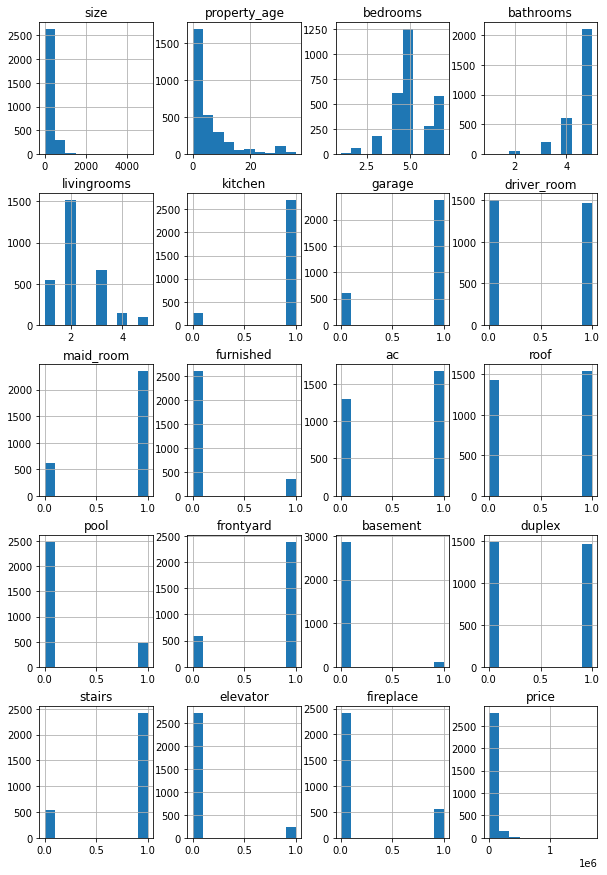

In [18]:
viz = housing
viz.hist(figsize = (10,15))
plt.show()

In [19]:
Khobar = housing[housing['city'] == ' الخبر']
Riyadh = housing[housing['city'] == ' الرياض']
dammam = housing[housing['city'] == ' الدمام']
Jaddah = housing[housing['city'] == ' جدة']

In [20]:
Khobar_district = Khobar.district.value_counts(normalize=True)*100
Khobar_district.head() 

   حي اللؤلؤ            15.424165
   حي التحلية           15.038560
   حي الصواري           14.395887
   حي الكورنيش          10.539846
   حي الحزام الاخضر      9.640103
Name: district, dtype: float64

In [21]:
Riyadh_distric = Riyadh.district.value_counts(normalize=True)*100
Riyadh_distric.head()

   حي العارض       13.766234
   حي الرمال       12.727273
   حي طويق          4.285714
   حي الملقا        4.285714
   حي المونسية      3.766234
Name: district, dtype: float64

In [22]:
dammam_distric = dammam.district.value_counts(normalize=True)*100
dammam_distric.head()

   حي ضاحية الملك فهد     19.252078
   حي المنار              11.218837
   حي الشعلة               7.894737
   حي الشاطئ الغربي        6.232687
   حي طيبة                 5.955679
Name: district, dtype: float64

In [23]:
Jaddah_distric = Jaddah.district.value_counts(normalize=True)*100
Jaddah_distric.head()

   حي المحمدية     12.073864
   حي الروضة       11.647727
   حي الشاطئ       10.937500
   حي البساتين      9.232955
   حي الياقوت       8.664773
Name: district, dtype: float64

In [24]:
print(' The highest distric where there are offers  in \n Riyadh = {}\nJeddah = {}\nDammam = {}\nKhobar = {}'.format(
    Riyadh_distric.max(),
    Jaddah_distric.max(),
    dammam_distric.max(),
    Khobar_district.max()))

 The highest distric where there are offers  in 
 Riyadh = 13.766233766233766
Jeddah = 12.073863636363637
Dammam = 19.252077562326868
Khobar = 15.424164524421593


In [25]:
# the feature other than price that is most correlated with price.
# From the data shown in the table below, it is clear that the most important relationship that affects the price is the size
housing.corr()['price'].sort_values() 

duplex         -0.106417
bedrooms       -0.056966
fireplace      -0.036391
roof            0.000574
bathrooms       0.036376
kitchen         0.079542
frontyard       0.081387
stairs          0.082135
garage          0.092557
elevator        0.103474
furnished       0.150448
property_age    0.155458
livingrooms     0.157504
maid_room       0.188583
pool            0.231481
ac              0.241923
basement        0.278105
driver_room     0.292600
size            0.405481
price           1.000000
Name: price, dtype: float64

In [26]:
def fixTypes(details):
    details =  str(details)
    rent = "Unkown"
    if( details.find('دور') != -1 or details.find('دور') != -1 ):
        rent = 'floor'
    elif( details.find('شقه') != -1):
        rent = 'apartment'
    elif( details.find('فله') != -1 or details.find('فلة') != -1 or details.find('فيلا') != -1 or details.find('دبلكس') != -1 or details.find('دوبلكس') != -1 or 
        details.find('بيت') != -1 or details.find('ڤيلا') != -1 or details.find('فلل') != -1 or details.find('دبلوكسين') != -1 or details.find('فلا') != -1
        or details.find('فيلا ') != -1 or details.find('دبلوكس ') != -1):  
        rent = 'اhouse'
    else:
        rent = 'Unkown'
        
    return rent

housing.loc[:,'Accommodation_types'] = housing.loc[:,'details'].apply(fixTypes)

In [27]:
housing.head(10)

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,Accommodation_types
0,الرياض,حي الجنادرية,شرق,246,0,5,5,2,1,1,...,0,0,0,0,1,0,0,40000,درج داخلي للايجار التوالصل 0538143083,Unkown
1,جدة,حي بريمان,جنوب,350,0,7,5,2,1,1,...,0,0,0,1,1,1,0,45000,فلة روف مكونه من٩غرف و٧حمامات وسطح مرة كبير ون...,اhouse
2,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,1,...,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...,floor
3,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,1,...,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...,floor
4,الرياض,حي الروضة,جنوب,352,30,7,5,2,1,1,...,0,1,0,0,1,0,1,80000,الجزء الثالث والاخير للتصوير\n================...,اhouse
5,الرياض,حي الروضة,شرق,900,15,4,4,2,1,1,...,0,1,0,0,1,0,1,150000,فيلا للايجار بحي الروضه \nمجلس وصاله ومقلط ومط...,floor
6,الرياض,حي المصيف,غرب,500,10,5,5,5,1,1,...,0,1,1,0,1,1,0,150000,فيلا بحي المصيف للايجار \nخمس اجنحة وقبو مجالس...,اhouse
7,جدة,حي البساتين,شرق,300,7,3,4,3,1,1,...,1,1,0,1,1,0,0,115000,فيلا فاخرة للايجار مؤثثة بالكامل حي البساتين ...,floor
8,الدمام,حي الشعلة,غرب,345,4,5,5,2,1,1,...,0,1,0,1,0,0,0,60000,للايجار \nدبلكس منفصل في حي الرحاب الدمام\nمعل...,floor
9,الخبر,حي المدينة الرياضية,جنوب غربي,200,7,5,4,1,1,0,...,0,0,0,0,1,0,0,43000,شقه دوبلكس تتكون من 2 طابق مدخل خاص \nبالراكه ...,floor


In [28]:
type = housing.Accommodation_types.value_counts(normalize=True)*100
type

floor        62.575656
اhouse       29.085407
Unkown        8.137189
apartment     0.201748
Name: Accommodation_types, dtype: float64

In [41]:
print(' The highest type of accommodation is: {0}  And The least type of accommodation is: {1}'.format(type.max(),type.min()))

 The highest type of accommodation is: 62.57565568258238  And The least type of accommodation is: 0.20174848688634836


In [30]:
d_floor = housing[housing['Accommodation_types'] == 'floor']

In [31]:
d_floor.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,Accommodation_types
2,الرياض,حي الرمال,جنوب,280,3,4,3,1,0,1,...,0,1,0,0,1,0,1,3300,درج داخلي للأيجار شهري3300\nالمواصفات \nالأرض...,floor
3,الدمام,حي ضاحية الملك فهد,شمال,250,5,5,5,3,1,1,...,0,1,0,0,1,0,0,36000,للايجار فيلا دبلكس دورين وملحق في ضاحيه الملك ...,floor
5,الرياض,حي الروضة,شرق,900,15,4,4,2,1,1,...,0,1,0,0,1,0,1,150000,فيلا للايجار بحي الروضه \nمجلس وصاله ومقلط ومط...,floor
7,جدة,حي البساتين,شرق,300,7,3,4,3,1,1,...,1,1,0,1,1,0,0,115000,فيلا فاخرة للايجار مؤثثة بالكامل حي البساتين ...,floor
8,الدمام,حي الشعلة,غرب,345,4,5,5,2,1,1,...,0,1,0,1,0,0,0,60000,للايجار \nدبلكس منفصل في حي الرحاب الدمام\nمعل...,floor


In [46]:
# Encoding categorical data 
ohe = OneHotEncoder()
feature_array = ohe.fit_transform(d_floor[["city"]]).toarray()
feature_lable = ohe.categories_
feature = pd.DataFrame(feature_array,columns=feature_lable)
df_new = pd.concat([d_floor,feature],axis=1)
# avoiding dummy varible trap 
df_new.drop(columns= (' جدة',),inplace = True)

In [33]:
df_new.corr()['price'].sort_values()
# From the data shown in the table below, it is clear that the most important relationship that affects the price is the ac 


bedrooms       -0.127939
fireplace      -0.086013
duplex         -0.069236
roof           -0.054480
( الدمام,)     -0.028029
bathrooms      -0.021574
( الخبر,)       0.012268
( الرياض,)      0.025570
frontyard       0.042370
kitchen         0.083111
stairs          0.098430
property_age    0.105246
garage          0.116576
elevator        0.146291
livingrooms     0.159134
furnished       0.168334
size            0.192309
maid_room       0.215694
basement        0.236925
pool            0.250380
driver_room     0.277348
ac              0.290579
price           1.000000
Name: price, dtype: float64

In [34]:
d_floor.to_csv('d_floor.csv')